In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
data = pd.read_csv("bank.csv",sep=";")  
print(data.shape)
print(list(data.columns))
data['y'] =  np.where(data['y']=='no', 0,data['y'])
data['y'] =  np.where(data['y']=='yes',1,data["y"])

(4521, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


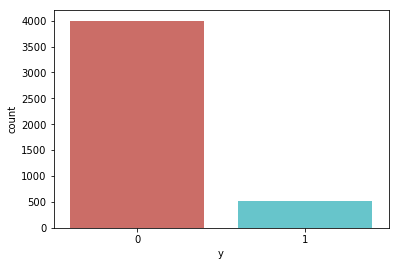

In [5]:
data['education'].unique()
data['y'].value_counts()
sns.countplot(x="y",data=data,palette= 'hls')
plt.show()
plt.savefig("count_plot")

In [76]:
data['y']
data['y'].value_counts()
count_no_sub = len(data[data["y"]==0] )
count_yes_sub = len(data[data['y']==1])
count_all = count_no_sub + count_yes_sub
pct_of_no_sub  =  count_no_sub/count_all
pct_of_yes_sub =  count_yes_sub/count_all
print(pct_of_no_sub,pct_of_yes_sub)
data

0.8847600088476001 0.11523999115239991


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,0
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,0
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,0
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,0
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,0


In [6]:
data.groupby('y').mean()
data.groupby('job').mean()
data.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.475379,1122.390152,15.753788,279.232955,2.604167,38.827652,0.439394
married,43.454415,1463.195567,15.905971,256.528781,2.847336,38.466929,0.519128
single,33.927258,1460.414716,16.008361,274.601171,2.751672,43.220736,0.642977


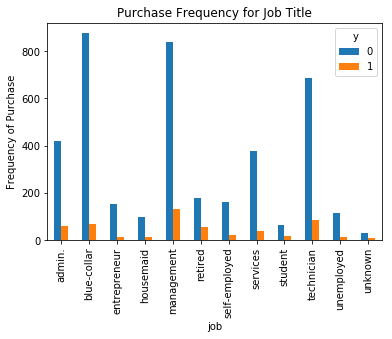

In [7]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind = "bar")
plt.title("Purchase Frequency for Job Title")
plt.xlabel('job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

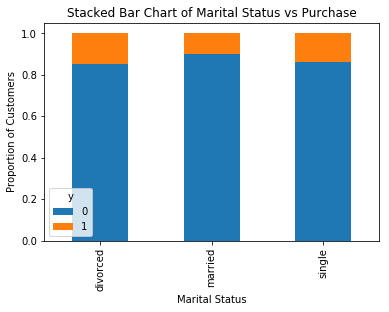

In [8]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

In [9]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=pd.concat([data,cat_list])
    data=data1
    
cat_vars=['job','marital','education','default','housing','loan','contact','month','day','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values

/home/wangyujie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


array(['age', 'balance', 'campaign', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'day_1.0', 'day_10.0',
       'day_11.0', 'day_12.0', 'day_13.0', 'day_14.0', 'day_15.0',
       'day_16.0', 'day_17.0', 'day_18.0', 'day_19.0', 'day_2.0',
       'day_20.0', 'day_21.0', 'day_22.0', 'day_23.0', 'day_24.0',
       'day_25.0', 'day_26.0', 'day_27.0', 'day_28.0', 'day_29.0',
       'day_3.0', 'day_30.0', 'day_31.0', 'day_4.0', 'day_5.0', 'day_6.0',
       'day_7.0', 'day_8.0', 'day_9.0', 'default_no', 'default_yes',
       'duration', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'housing_no',
       'housing_yes', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown', 'loan_no',
       'loan_yes', 'marital_divorced', 'marital_married', 'marital_single',

In [10]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

In [17]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
print(X_train,y_train)
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

      age  balance  campaign  contact_cellular  contact_telephone  \
2267  NaN      NaN       NaN               NaN                NaN   
1334  NaN      NaN       NaN               NaN                NaN   
1506  NaN      NaN       NaN               NaN                NaN   
1623  NaN      NaN       NaN               NaN                NaN   
3758  NaN      NaN       NaN               0.0                0.0   
423   NaN      NaN       NaN               NaN                NaN   
466   NaN      NaN       NaN               NaN                NaN   
56    NaN      NaN       NaN               NaN                NaN   
2246  NaN      NaN       NaN               NaN                NaN   
499   NaN      NaN       NaN               NaN                NaN   
372   NaN      NaN       NaN               NaN                NaN   
1521  NaN      NaN       NaN               NaN                NaN   
2131  NaN      NaN       NaN               NaN                NaN   
3218  NaN      NaN       NaN      

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').